### First Insights

I start off with importing basic libraries and taking the first look at the data.
Columns haven't been explicitly described in the source of the dataset, nevertheless their names seem to be clear enough to get the idea what they depict.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('loan_train.csv')
test = pd.read_csv('loan_test.csv')

In [3]:
train.shape

(614, 13)

In [4]:
test.shape

(367, 12)

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Seems like I have a fundamental idea about the dataset already. "Loan_ID" column will be useless in terms of building a model, so I drop it, apart from I create the target variable and drop it from both train and test datasets.

In [12]:
train.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)

In [13]:
y = train['Loan_Status'].reset_index(drop=True)
train_features = train.drop(['Loan_Status'], axis=1)
test_features = test

### Analysis

Time to inspect the data deeper. I start with a correlation table and drop its top part as it's just a mirrow of the part below. Thanks to that I can look for and understand the linear relations between the features.

**First obeservations:**

- Most of the features don't appear to be strongly correlated.
- Crucial for the dataset and our future model might be relation between "LoanAmount" column and respectively "ApplicantIncome" and "CoapplicantIncome" columns. We should keep that in mind for the future inspectations.

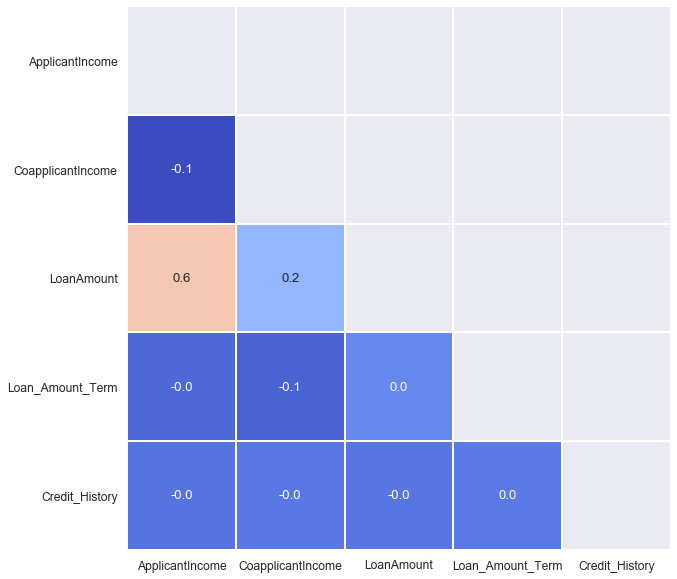

In [14]:
sns.set(font_scale=1.1)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

I'm merging the datasets before cleaning and further editing as doing it twice would be pointless.

In [15]:
features = pd.concat([train_features, test_features]).reset_index(drop=True)
features.shape

(981, 11)

In [16]:
df_num = features[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
df_cat = features[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']]

I divided the features into numerical and categorical DataFrames. Division is based on the datatypes shown above after executing .info() command.<br>
I draw the histograms and bar plots for numerical and categorical data respectively.

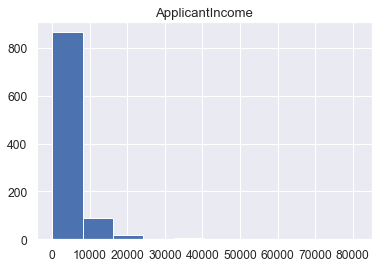

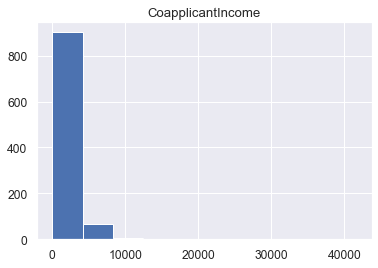

C:\Users\sulew\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sulew\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


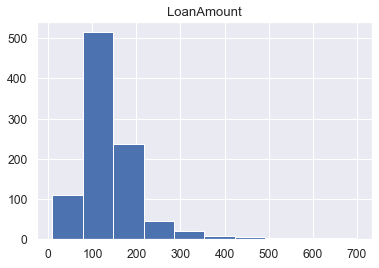

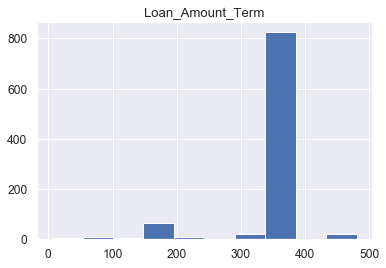

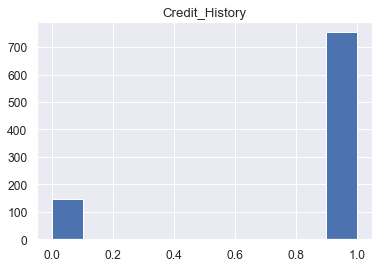

In [17]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

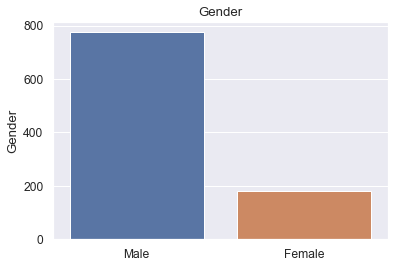

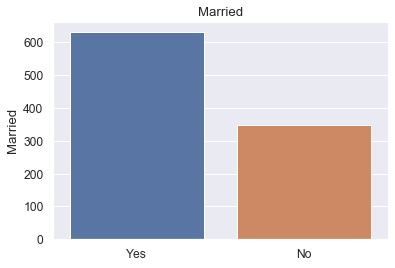

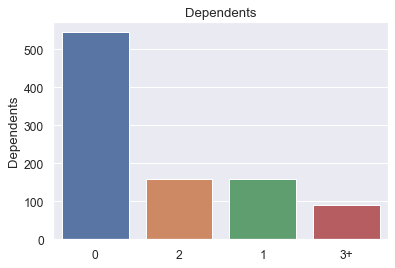

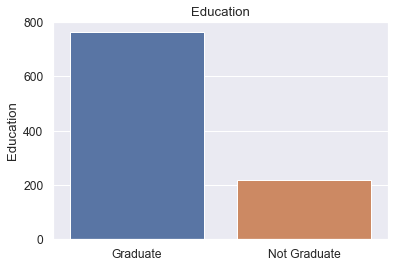

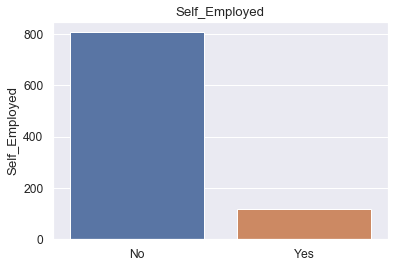

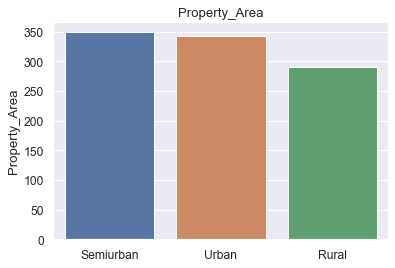

In [18]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

**Observations:**
- Numerical data is far from normal distribution. I consider normalizing at least some features later on.
- It appears that although "Credit_History"'s datatype is numerical, in reality that's categorical data as the only values it takes are 0s and 1s. I'll consider it as a categorical data.
- Apart from "Property_Area" feature, categorical data might appear imbalanced, in fact it's not that messy, to be forced to do some feature engineering, not doing that shouldn't impact my model drastically.
- I consider "Dependents" feature as half-one-hot-encoded. I'll encode it to one-hot vectors just by changing the "3+" value and convert it to integer datatype.

Now let's look at the percentage of null values in the columns.

In [19]:
def missing_val_per(df):
    summary = df.isnull().sum().sort_values(ascending=False)
    percentage = round((summary / len(df) * 100), 2)
    return pd.concat([summary, percentage], axis=1, keys=['Summary', 'Percentage'])

In [20]:
missing_val_per(features)

,Summary,Percentage
Credit_History,79,8.05
Self_Employed,55,5.61
LoanAmount,27,2.75
Dependents,25,2.55
Gender,24,2.45
Loan_Amount_Term,20,2.04
Married,3,0.31
Property_Area,0,0.00
CoapplicantIncome,0,0.00
ApplicantIncome,0,0.00


I separate the columns into 2 groups:
- Null values arise from nonexistence, they might have been measured and they represent 0 value. Those are so called "zero" columns
- Null values represent empty cells, in this case I'm going to replace them with the value that appears most often.

Of course this division is very subjective and comes from my insights which I got from analysis above.

In [21]:
zero_cols = ['Credit_History', 'Dependents', 'LoanAmount']
mode_cols = ['Self_Employed', 'Gender', 'Loan_Amount_Term']

In [22]:
for col in zero_cols:
    features[col].replace(np.nan, 0, inplace=True)

for col in mode_cols:
    features[col].replace(np.nan, features[col].mode()[0], inplace=True)

features['Married'].replace(np.nan, 'No', inplace=True)

In [23]:
features.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

I plot the 2 most correlated features with respect to the target variable, based on the matrix shown above.<br>
The boxen plots are very helpful when it comes to outliers detection.

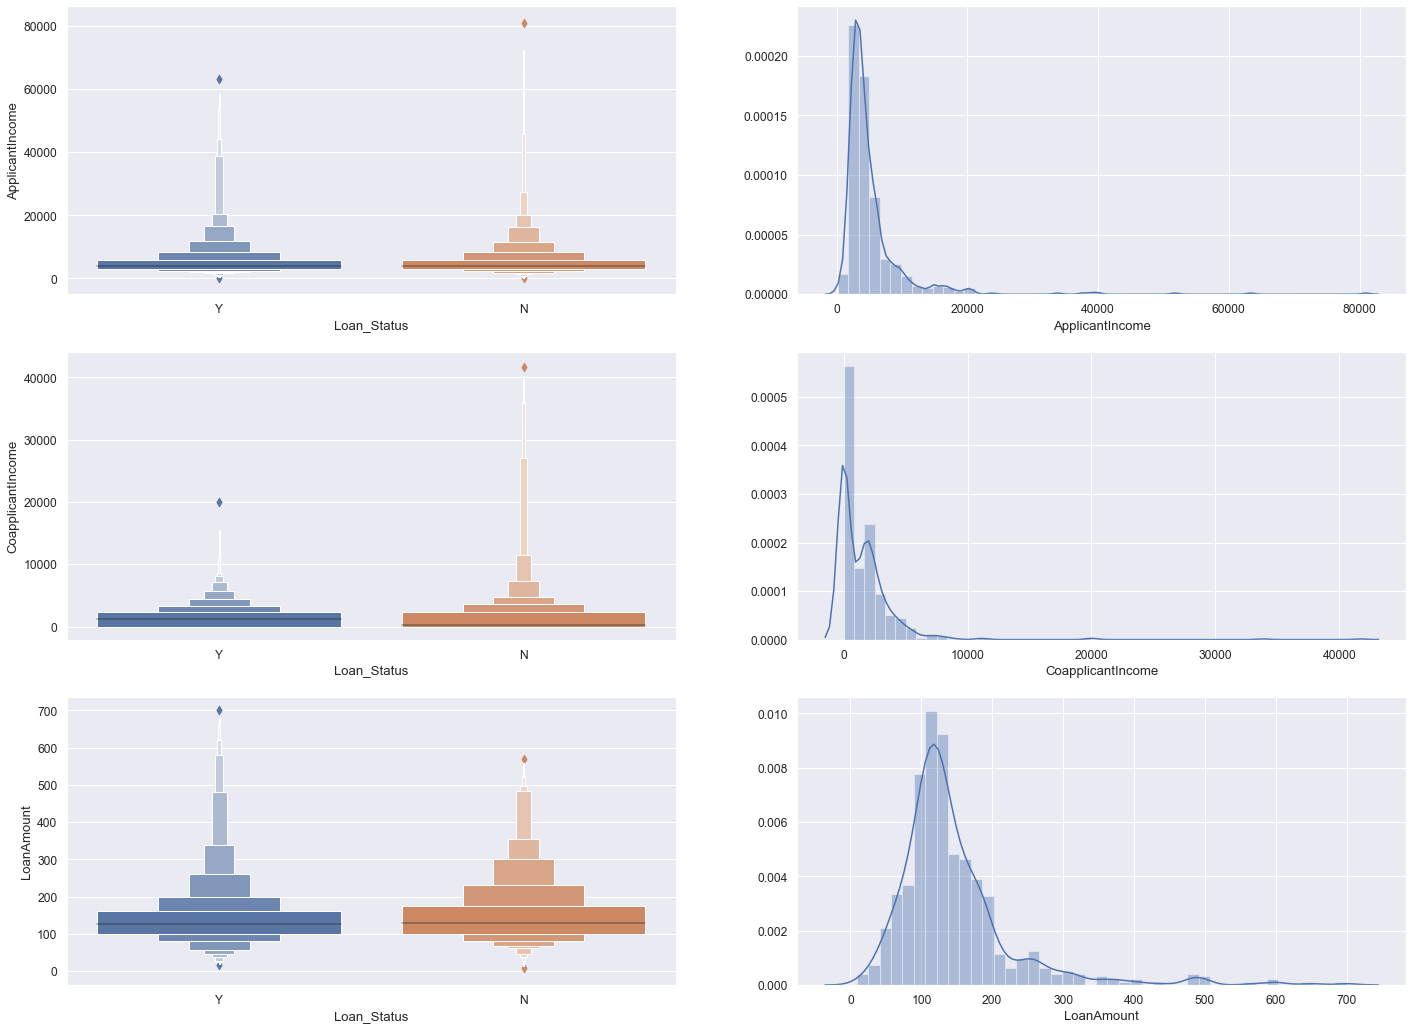

In [24]:
cols_num_box = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

plt.figure(figsize=(24, 18))
count = 1

for cols in cols_num_box:
    
    plt.subplot(3, 2, count)
    
    sns.boxenplot(x='Loan_Status', y=cols, data=train)
    
    count +=1
    
    plt.subplot(3, 2, count)
    
    sns.distplot(train.loc[train[cols].notna(), cols])
    
    count+=1

**Observations:**
- It seems that the top value in ApplicantIncome's column might be an outlier, despite the highest income (by far) in our dataset, the applicant hasn't received a loan. Nevertheless it's worth having a look on the other features in that record before final judgement.
- Most of the values in the plots look reasonably

In [25]:
train.nlargest(5, ['ApplicantIncome'])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
333,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y


In [26]:
train.nlargest(5, ['CoapplicantIncome'])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
581,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
402,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
417,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N
177,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N


I'm inspecting few other correlations between the features, checking if there's nothing puzzling.

In [27]:
pd.pivot_table(features, index='Gender', columns='Married', values='ApplicantIncome', aggfunc='mean')

Married,No,Yes
Gender,,
Female,4439.376000,4501.736842
Male,4986.306667,5484.214286


In [28]:
pd.pivot_table(features, index='Gender', columns='Married', values='LoanAmount', aggfunc='mean')

Married,No,Yes
Gender,,
Female,114.488000,144.701754
Male,128.226667,147.292683


In [29]:
pd.pivot_table(features, index='Gender', columns='Education', values='ApplicantIncome', aggfunc='mean')

Education,Graduate,Not Graduate
Gender,,
Female,4598.175676,3852.676471
Male,5844.117073,3672.423913


Now it's the highest time to take care of the categorical features:
- "Credit_History" is the categorical variable under the numerical label, the only values it takes is either 0 or 1 so it's not necessary to one-hot encode it
- "Dependents" is the categorical variable that can take 4 different values, one of which is a string. It's more convenient to convert that value into an integer rather than one-hot encoding all the values of the future
- Rest of the categorical variables are being treated with OneHotEncoder

In [30]:
from sklearn.preprocessing import OneHotEncoder

s = (features.dtypes == 'object')
oh_cols = list(s[s].index)
oh_cols.remove("Dependents")

In [31]:
df_num = features[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
df_cat = features[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']]

oh_enc = OneHotEncoder(sparse=False)
oh_fit = pd.DataFrame(oh_enc.fit_transform(features[oh_cols]))

features_final = pd.concat([df_num, oh_fit], axis=1)

In [32]:
features_final.insert(2, "Dependents", df_cat['Dependents'], True)

In [33]:
features_final['Dependents'] = features_final.Dependents.apply(lambda x: int(4) if x=='3+' else int(x))
y = y.apply(lambda x: 1 if x=='Y' else 0)

I got rid of categorical variables. Time to separate the data back to train and test sets and scale them.

In [34]:
train = features_final.iloc[:len(y), :]
test = features_final.iloc[len(train):, :]

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train = train
X_test = test

# _, _, y_train, y_test = train_test_split(train, y, test_size=0.2)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.metrics import f1_score

f1_list = []

def compute_f1_score(model):
    regressor = model.fit(X_train_scaled, y)
    y_pred = regressor.predict(X_test_scaled)
    score = f1_score(y[:367], y_pred)
    f1_list.append(score)
    
    return print('F1 score: ', score)

### Model Building

I have a habit of starting with the simplest NaiveBayes classifier and then moving through more advanced ones, ending up with learning SupportVectorMachines and ExtremeGradientBoost classifiers.<br>
First of all, for each of them I calculate the cross validation score on the 5 folds with default hyperparametres and F1 score which combines both of the precision and recall metrics.

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [39]:
cv_list = []

gnb = GaussianNB()

cv = cross_val_score(gnb, X_train_scaled, y, cv=5)
cv_list.append(cv.mean())
compute_f1_score(gnb)
print('CrossValidationScore: ', cv.mean())

F1 score:  0.7476280834914611
CrossValidationScore:  0.7313074770091963


In [40]:
lr = LogisticRegression(max_iter = 2000)

cv = cross_val_score(lr, X_train_scaled, y, cv=5)
cv_list.append(cv.mean())
compute_f1_score(lr)
print('CrossValidationScore: ', cv.mean())

F1 score:  0.7588785046728972
CrossValidationScore:  0.7687591630014661


In [41]:
dt = DecisionTreeClassifier(random_state=1)

cv = cross_val_score(dt, X_train_scaled, y, cv=5)
cv_list.append(cv.mean())
compute_f1_score(dt)
print('CrossValidationScore: ', cv.mean())

F1 score:  0.704950495049505
CrossValidationScore:  0.682407037185126


In [42]:
kn = KNeighborsClassifier()

cv = cross_val_score(kn, X_train_scaled, y, cv=5)
cv_list.append(cv.mean())
compute_f1_score(kn)
print('CrossValidationScore: ', cv.mean())

F1 score:  0.7596330275229357
CrossValidationScore:  0.7215247234439558


In [43]:
rf = RandomForestClassifier(random_state=1)

cv = cross_val_score(rf, X_train_scaled, y, cv=5)
cv_list.append(cv.mean())
compute_f1_score(rf)
print('CrossValidationScore: ', cv.mean())

F1 score:  0.7286527514231499
CrossValidationScore:  0.728055444488871


In [44]:
svc = SVC(probability=True)

cv = cross_val_score(svc, X_train_scaled, y, cv=5)
cv_list.append(cv.mean())
compute_f1_score(svc)
print('CrossValidationScore: ', cv.mean())

F1 score:  0.7592592592592594
CrossValidationScore:  0.7573503931760628


In [45]:
xgb = XGBClassifier(random_state=1)

cv = cross_val_score(xgb, X_train_scaled, y, cv=5)
cv_list.append(cv.mean())
compute_f1_score(xgb)
print('CrossValidationScore: ', cv.mean())

F1 score:  0.7099236641221375
CrossValidationScore:  0.7035585765693722


In [46]:
lgb = LGBMClassifier()

cv = cross_val_score(lgb, X_train_scaled, y, cv=5)
cv_list.append(cv.mean())
compute_f1_score(lgb)
print('CrossValidationScore: ', cv.mean())

F1 score:  0.703846153846154
CrossValidationScore:  0.7052112488337998


In [47]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('gnb', gnb), ('lr', lr), ('dt', dt), ('kn', kn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting='soft')

cv = cross_val_score(voting_clf, X_train_scaled, y, cv=5)
print(cv)
print(cv.mean())

[0.7804878  0.69105691 0.74796748 0.7398374  0.75409836]
0.7426895908303346


In [48]:
labels = ['GaussianNaiveBayes', 'LogisticRegression', 'DecisionTree', 'KNearestNeighbours', 'RandomForest', 'SVM', 'XGBoost', 'LightGB']

In [49]:
def create_table(cv_list, f1_list, labels):
    
    model_table = pd.DataFrame()
    row_index = 0
    
    for cv_score, f1_score, label in zip(cv_list, f1_list, labels):

        model_table.loc[row_index, 'Model Name'] = label

        model_table.loc[row_index, 'cv_mean_score'] = cv_score
        
        model_table.loc[row_index, 'f1_score'] = f1_score

        row_index += 1

    model_table.sort_values(by=['f1_score'],
                            ascending=False,
                            inplace=True)
    
    return model_table

In [50]:
raw_models = create_table(cv_list, f1_list, labels)
display(raw_models.style.background_gradient(cmap='summer_r'))

,Model Name,cv_mean_score,f1_score
3,KNearestNeighbours,0.721525,0.759633
5,SVM,0.757350,0.759259
1,LogisticRegression,0.768759,0.758879
0,GaussianNaiveBayes,0.731307,0.747628
4,RandomForest,0.728055,0.728653
6,XGBoost,0.703559,0.709924
2,DecisionTree,0.682407,0.704950
7,LightGB,0.705211,0.703846


Considering CV score, the best non-tuned classifier turns out to be LogisticRegression. Nearly 77% of accuracy on the quite small and noisy dataset looks like an acceptable result.<br>
As I'm dealing with the classification problem, more trustworthy metric is F1 score, that's why I sorted the table according to that result.<br>
KNN, SVM and LR seem to perform similarly. Having those two metrics next to each other gives me better overview of the performances.<br>
Worth drawing for classification problems is also RocAucCurve, nevertheless in this project, I'm going to rely only on the two metrics mentioned above.<br>
Time to look for hyperparameters that will perform better on a given dataset.<br>

For simpler classifiers I'm going to use GridSearch to search among all the implemented combinations, for SVM and RandomForest I'll use randomized searching to save some time.

## Hyperparameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def param_search(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [75]:
params = {'max_iter' : [2000],
            'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

grid = GridSearchCV(lr, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_grid_lr = grid.fit(X_train_scaled, y)
best_score_lr = best_grid_lr.best_score_
param_search(best_grid_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.9s


Logistic Regression
Best Score: 0.7720378515260563
Best Parameters: {'C': 0.23357214690901212, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


In [76]:
params = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
grid = GridSearchCV(kn, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_grid = grid.fit(X_train_scaled, y)
best_score_kn = best_grid.best_score_
param_search(best_grid, 'KNearestNeighbours')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:    0.6s


KNearestNeighbours
Best Score: 0.7312808210049314
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.8s finished


In [77]:
params = {'kernel': ['rbf', 'linear', 'poly'], 
          'gamma': [.1,.5,1,2,5],
            'C': [.1, 1, 10, 100]}
    
grid = RandomizedSearchCV(svc, param_distributions = params, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_grid_svc = grid.fit(X_train_scaled, y)
best_score_svc = best_grid_svc.best_score_
param_search(best_grid, 'SVC')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    6.9s


SVC
Best Score: 0.7312808210049314
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.2min finished


In [78]:
params =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
grid = RandomizedSearchCV(rf, param_distributions = params, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_grid_rf = grid.fit(X_train_scaled, y)
best_score_rf = best_grid_rf.best_score_
param_search(best_grid_rf, 'Random Forest')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.2min finished


Random Forest
Best Score: 0.7557243769159003
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': True}


In [79]:
params = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

grid = GridSearchCV(xgb, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_grid_xgb = grid.fit(X_train_scaled, y)
best_score_xgb = best_grid_xgb.best_score_
param_search(best_grid, 'XGBoost')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  2.9min finished


XGBoost
Best Score: 0.7312808210049314
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [80]:
raw_models.loc[0, 'tuned_score'] = 'NA'
raw_models.loc[1, 'tuned_score'] = best_score_lr
raw_models.loc[2, 'tuned_score'] = 'NA'
raw_models.loc[3, 'tuned_score'] = best_score_kn
raw_models.loc[4, 'tuned_score'] = best_score_rf
raw_models.loc[5, 'tuned_score'] = best_score_svc
raw_models.loc[6, 'tuned_score'] = best_score_xgb
raw_models.loc[7, 'tuned_score'] = 'NA'

display(raw_models.style.background_gradient(cmap='summer_r'))

,Model Name,cv_mean_score,f1_score,tuned_score
3,KNearestNeighbours,0.721525,0.759633,0.731281
5,SVM,0.757350,0.759259,0.770399
1,LogisticRegression,0.768759,0.758879,0.772038
0,GaussianNaiveBayes,0.731307,0.747628,NA
4,RandomForest,0.728055,0.728653,0.755724
6,XGBoost,0.703559,0.709924,0.747594
2,DecisionTree,0.682407,0.704950,NA
7,LightGB,0.705211,0.703846,NA


**Observations:**
- I looked for the optimal parametres for the top 5 models. The models that did not get the parametres tuned have the value NA in the tuned_score column.
- The best final performance on the given dataset goes to SVM, whereas if I gave a bigger weight to the CV score, SVM could have been outperformed by LR.
- There is a lot of room for improvement especially in the feature engineering field that has been done before implementing and tuning the classifiers.

To get the better overview of the performance of the classifiers, I'll have a look at the features that two best classifiers consider as the most important.

### Feature importance

In [58]:
m = best_grid_lr.best_estimator_.fit(X_train, y)

print(np.std(X_train_scaled, 0)*m.coef_)

[[-1.15764110e-05 -4.19440421e-05  0.00000000e+00  3.44549116e-04
  -1.39365303e-03  1.92672192e+00  0.00000000e+00  0.00000000e+00
  -3.40418630e-01  0.00000000e+00  0.00000000e+00 -1.39632179e-01
   0.00000000e+00  0.00000000e+00 -1.37588904e-01  3.87914662e-01
   0.00000000e+00]]


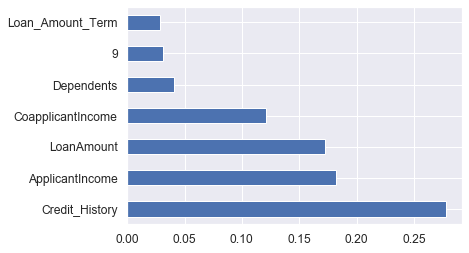

In [59]:
best_model = best_grid_rf.best_estimator_.fit(X_train, y)

feat_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

feat_importances.nlargest(7).plot(kind='barh')

Both of the classifiers consider "Credit History", "Applicant Income" and "Loan Amount" as the features that have the biggest impact on the predictions.<br>
I'm plotting Partial Dependence Plots (PDP) to get the insights more detailed insights, namely, how big change in predictions cause the specific values of those features.

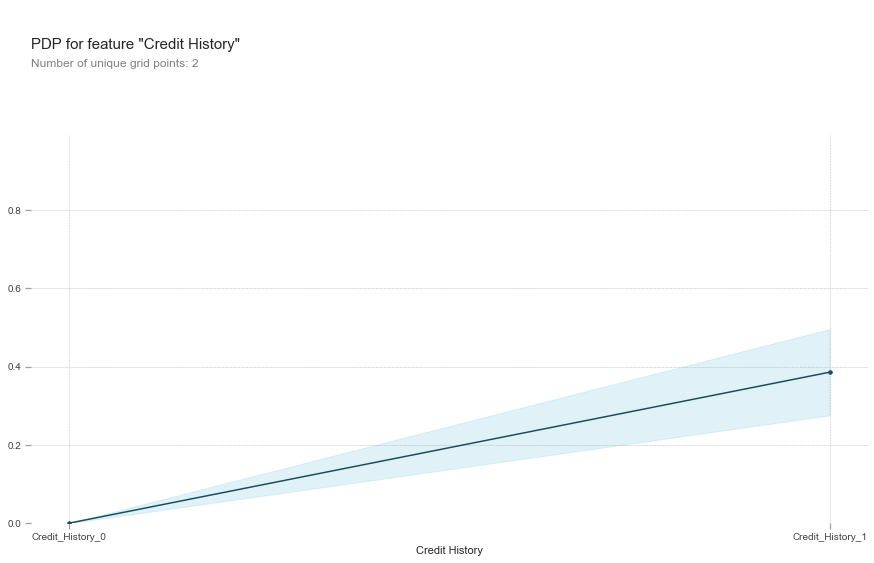

In [60]:
from pdpbox import pdp

pdp_qual = pdp.pdp_isolate(model=best_grid_rf.best_estimator_, dataset = X_test, model_features=X_test.columns.tolist(), feature='Credit_History')

pdp.pdp_plot(pdp_qual, 'Credit History')
plt.show()

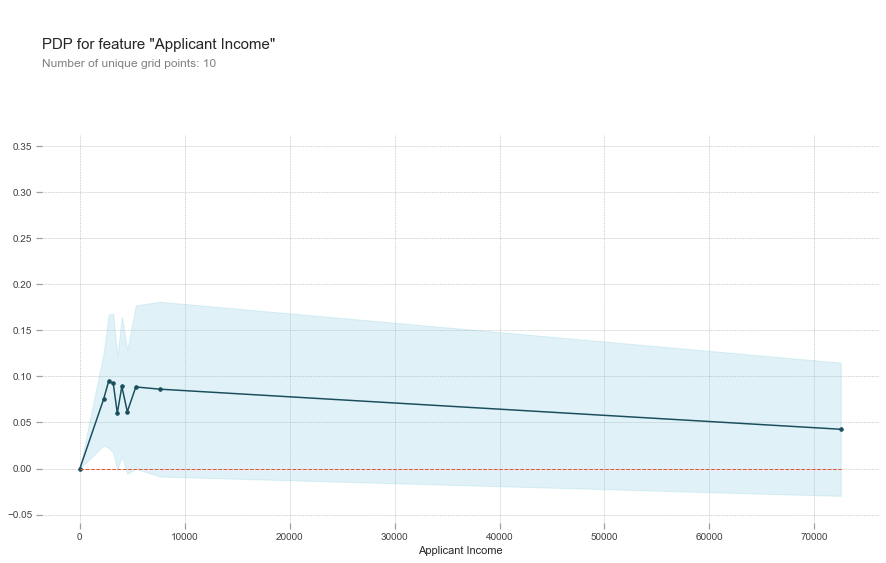

In [61]:
pdp_qual = pdp.pdp_isolate(model=best_grid_rf.best_estimator_, dataset = X_test, model_features=X_test.columns.tolist(), feature='ApplicantIncome')

pdp.pdp_plot(pdp_qual, 'Applicant Income')
plt.show()

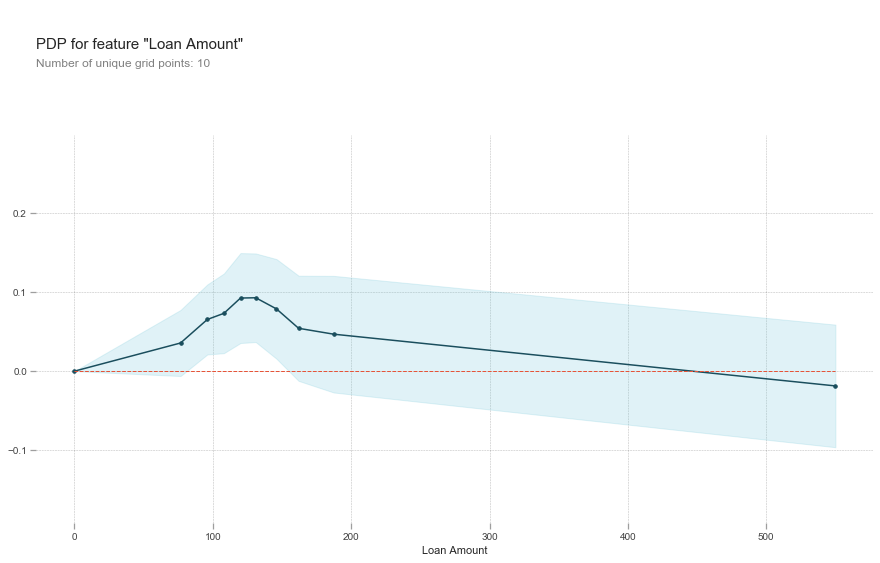

In [62]:
pdp_qual = pdp.pdp_isolate(model=best_grid_rf.best_estimator_, dataset = X_test, model_features=X_test.columns.tolist(), feature='LoanAmount')

pdp.pdp_plot(pdp_qual, 'Loan Amount')
plt.show()

**Observations:**
- You're more likely to get a loan if you've taken some credit in the past already. That makes sense - the classifiers considers you as more trustworthy person :)
- There is a slight negative slope in the Applicant Income PDP that says: the more income you have, the less likely you're to get a loan. That in fact doesn't make sense. Keep in mind that in the early phase of data exploration I detected an entry with a very high value of Applicant Income that got a negative decision regarding the loan. Back then I was unsure if it's an outlier, I still don't know that, but I can see that that one specific entry (because of having quite small dataset) may cause fake predictions.
- The more loan you want to get, the more unlikely you are to successfully get it. According to the plot the biggest chances you have with a loan ≈ 130.

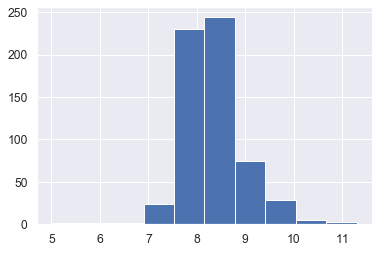

In [63]:
X_train['ApplicantIncome'] = np.log(X_train.ApplicantIncome+1)
X_train['ApplicantIncome'].hist()
# NOT USED

In [64]:
# X_train['LoanAmount'] = np.log(X_train.LoanAmount+1)
# X_train['LoanAmount'].hist()  
# NOT USED

In [65]:
X_train_scaled = scaler.fit_transform(X_train)

In [66]:
cv = cross_val_score(best_grid_lr.best_estimator_, X_train_scaled, y, cv=5)
cv_list.append(cv.mean())
print(cv)
print(cv.mean())

[0.80487805 0.7398374  0.72357724 0.78861789 0.80327869]
0.7720378515260563


I tried to normalize ApplicantIncome and LoanAmount features as their distribution is far from normal one and check how it influenced our model. The effect is close to 0, so I abandoned this idea.

At the end I'm saving the predictions of the three best models to the csv files.

In [67]:
y_hat_lr = best_grid_lr.predict(X_test_scaled).astype(int)
y_hat_svc = best_grid_svc.predict(X_test_scaled).astype(int)
y_hat_rf = best_grid_rf.predict(X_test_scaled).astype(int)

In [68]:
pred_lr = {'Loan_ID': test.index, 'Loan_Status': y_hat_lr}
submission_1 = pd.DataFrame(data=pred_lr)

pred_svc = {'Loan_ID': test.index, 'Loan_Status': y_hat_svc}
submission_2 = pd.DataFrame(data=pred_svc)

pred_rf = {'Loan_ID': test.index, 'Loan_Status': y_hat_rf}
submission_3 = pd.DataFrame(data=pred_rf)

In [69]:
from datetime import datetime

submission_1.to_csv('submission_lr.csv', index=False)
submission_2.to_csv('submission_svc.csv', index=False)
submission_3.to_csv('submission_rf.csv', index=False)

print('Submission completed', datetime.now())

Submission completed 2020-09-28 18:15:26.443148


### Conclusion

In this classification project I tried to automate the loan eligibility process based on data provided by the customers.<br>
That's a very common problem among insurance companies, whereas among all industries insurance field has one of the largest use of data science and analytics methods.<br>
I went through basic EDA methods and ended up implementing 8 different classifiers.<br>
The input data wasn't very messy, I didn't spend too much time on the feature engineering - there's still a big room for improvement in this field, especially when it comes to coming up with an idea for new features.<br>
The model that performed the best was LogisticRegression with the accuracy close to 77.5%. Right behind was SVM and RandomForest.<br>
Work on this project could give me a proper, basic overview of the challenges the insurance companies face and what variables influence the outcome the most.

### Future work and possible improvements

- As already mentioned - deeper feature engineering with an emphasis on new features creation and development of combinations between existing ones can give a significant boost in model's performance.<br>
- Wider range of grid search on the chosen classifiers could also lead to some improvements, together with plotting RocAucCurves for each of them what would give a better insight in precision/recall pattern.<br>
- Usage of more advanced regression techniques like stacking or blending, testing different combinations of classifiers on the VotingClassifier (soft and hard). Those techniques are also definitely worth giving a try.

As soon as time and processing power of my dying computer let me, I'll come back to this project for further improvements and experiments.<br>

<i>Paweł Sulewski</i>